In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Load thermal images
def load_images(image_dir):
    images = []
    for filename in sorted(os.listdir(image_dir)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = cv2.imread(os.path.join(image_dir, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

# Step 2: Preprocess images
def preprocess_image(image):
    # Normalize the image to temperature values (assuming 0-255 maps to temperature range)
    normalized_img = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return normalized_img

# Step 3: Extract features
def extract_features(image):
    mean_temp = np.mean(image)
    var_temp = np.var(image)
    return mean_temp, var_temp

# Step 4: Analyze data
def analyze_data(features):
    df = pd.DataFrame(features, columns=['Day', 'Mean_Temperature', 'Variance'])
    return df

# Step 5: Visualize results
def plot_results(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Day'], df['Mean_Temperature'], label='Mean Temperature')
    plt.plot(df['Day'], df['Variance'], label='Temperature Variance')
    plt.xlabel('Day')
    plt.ylabel('Temperature')
    plt.title('Thermal Image Analysis Over 10 Days')
    plt.legend()
    plt.show()

# Main function
def main(image_dir):
    images = load_images(image_dir)
    features = []
    for day, image in enumerate(images):
        preprocessed_image = preprocess_image(image)
        mean_temp, var_temp = extract_features(preprocessed_image)
        features.append((day, mean_temp, var_temp))
    
    df = analyze_data(features)
    plot_results(df)

# Run the analysis
image_directory = 'path_to_your_thermal_images'
main(image_directory)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_your_thermal_images'

In [1]:
# Install necessary libraries (if not already installed)
# !pip install numpy pandas matplotlib seaborn opencv-python scikit-image tensorflow keras scikit-learn

# Import necessary libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

def load_images_and_annotations(data_dir, img_size=(64, 64)):
    """
    Load images and corresponding YOLO annotations from a directory.
    
    Args:
    - data_dir (str): Path to the dataset directory.
    - img_size (tuple): Desired image size (width, height).
    
    Returns:
    - images (np.array): Array of preprocessed images.
    - boxes (list): List of bounding boxes for each image.
    - labels (np.array): Array of labels corresponding to the images.
    """
    images = []
    labels = []
    boxes = []

    images_dir = os.path.join(data_dir, 'images')
    annotations_dir = os.path.join(data_dir, 'annotations_yolo_format')

    for file in os.listdir(images_dir):
        img_path = os.path.join(images_dir, file)
        annotation_path = os.path.join(annotations_dir, file.replace('.jpeg', '.txt'))

        # Load and preprocess the image
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:  # Check if the image is loaded correctly
            img = cv2.resize(img, img_size)  # Resize images
            images.append(img)

            # Check if the annotation file exists
            if os.path.exists(annotation_path):
                with open(annotation_path, 'r') as f:
                    bboxes = []
                    for line in f:
                        parts = line.strip().split()
                        
                        # Convert class_id to integer and coordinates to float
                        try:
                            class_id = int(parts[0])  # Correctly convert class_id to integer
                        except ValueError:
                            print(f"Invalid class ID found in file {annotation_path}: {parts[0]}")
                            continue  # Skip this line if class_id is not a valid integer
                        
                        try:
                            x_center, y_center, width, height = map(float, parts[1:])
                        except ValueError as e:
                            print(f"Error parsing annotation in file {annotation_path}: {e}")
                            continue  # Skip this line if coordinates are not valid floats
                        
                        # Convert YOLO format to pixel values
                        x_center *= img_size[0]
                        y_center *= img_size[1]
                        width *= img_size[0]
                        height *= img_size[1]

                        # Convert to (x_min, y_min, x_max, y_max) format
                        x_min = int(x_center - (width / 2))
                        y_min = int(y_center - (height / 2))
                        x_max = int(x_center + (width / 2))
                        y_max = int(y_center + (height / 2))

                        bboxes.append([x_min, y_min, x_max, y_max, class_id])
                    
                    boxes.append(bboxes)
                    labels.append(class_id)
            else:
                print(f"Warning: Annotation file {annotation_path} not found for image {img_path}. Skipping this image.")
                continue  # Skip this image if the annotation file is not found

    if len(images) == 0:
        raise ValueError(f"No images found in directory {data_dir}. Please check the path and ensure there are images present.")

    images = np.array(images, dtype='float32')
    images = images / 255.0  # Normalize to [0, 1]
    labels = np.array(labels)

    return images, boxes, labels
def prepare_data(data_dir):
    """
    Prepare training and testing data including YOLO annotations.
    
    Args:
    - data_dir (str): Path to the dataset directory.
    
    Returns:
    - X_train, X_test, y_train, y_test: Train/test split of data.
    """
    images, boxes, labels = load_images_and_annotations(data_dir)
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension
    X_test = np.expand_dims(X_test, axis=-1)

    return X_train, X_test, y_train, y_test, boxes

# Load and preprocess the dataset
data_dir = 'E:\\agricultural_research\\agri_code_files\\themal_image_analysis\\data\\train'
try:
    X_train, X_test, y_train, y_test, boxes = prepare_data(data_dir)
    print(f'Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}')
except ValueError as e:
    print(e)


Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.162500
Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.362500
Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.550000
Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.643750
Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.793750
Invalid class ID found in file E:\agricultural_research\agri_code_files\themal_image_analysis\data\train\annotations_yolo_format\group1_16.txt: 00.071875
Training data shape: (1020, 64, 64, 1), Testing data shape: (255, 64, 64, 1)

In [5]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def create_cnn_model_with_bboxes(input_shape):
    """
    Define a CNN model for thermal image analysis with bounding box prediction.
    
    Args:
    - input_shape (tuple): Shape of the input data (height, width, channels).
    
    Returns:
    - model (tf.keras.Model): Compiled CNN model.
    """
    inputs = Input(shape=input_shape)
    
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output for class prediction
    class_output = Dense(1, activation='sigmoid', name='class_output')(x)
    
    # Output for bounding box regression
    bbox_output = Dense(4, activation='linear', name='bbox_output')(x)

    model = Model(inputs=inputs, outputs=[class_output, bbox_output])
    
    model.compile(optimizer='adam', 
              loss={'class_output': 'binary_crossentropy', 'bbox_output': 'mean_squared_error'}, 
              loss_weights={'class_output': 1.0, 'bbox_output': 0.1}, 
              metrics={'class_output': 'accuracy', 'bbox_output': 'mse'})

    
    return model

# Initialize model
input_shape = X_train.shape[1:]
model = create_cnn_model_with_bboxes(input_shape)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 31, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 29, 29, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

In [6]:
import numpy as np

def pad_boxes(boxes, max_boxes=1):
    """
    Pad bounding boxes to a consistent shape.
    
    Args:
    - boxes (list): List of bounding boxes for each image.
    - max_boxes (int): Maximum number of bounding boxes to keep for each image.
    
    Returns:
    - padded_boxes (np.array): Array of padded bounding boxes with shape (num_images, max_boxes, 4).
    """
    padded_boxes = []
    
    for bbox_list in boxes:
        if len(bbox_list) > max_boxes:
            bbox_list = bbox_list[:max_boxes]  # Keep only the first `max_boxes` bounding boxes
        else:
            # Pad with zeros if there are fewer bounding boxes
            bbox_list += [[0, 0, 0, 0]] * (max_boxes - len(bbox_list))
        
        # Only keep the coordinates (x_min, y_min, x_max, y_max)
        padded_boxes.append([box[:4] for box in bbox_list])
    
    return np.array(padded_boxes)

# Ensure boxes are padded to a consistent shape
max_boxes_per_image = 1  # Set to the maximum number of bounding boxes you expect per image
padded_boxes = pad_boxes(boxes, max_boxes=max_boxes_per_image)

# Adjust the training loop to use padded boxes
def train_model(X_train, X_test, y_train, y_test, padded_boxes, model_save_path, epochs=20, batch_size=32):
    checkpoint = ModelCheckpoint(model_save_path, save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, {'class_output': y_train, 'bbox_output': padded_boxes[:len(X_train)]},
        validation_data=(X_test, {'class_output': y_test, 'bbox_output': padded_boxes[len(X_train):]}),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[checkpoint, early_stopping]
    )

    model.save(model_save_path)
    print("Model training completed and saved.")
    
    return history

# Train the model
model_save_path = 'E:\\HCL_Technical_Lead\\agricultural_research\\agri_code_files\\themal_image_analysis\\models'
history = train_model(X_train, X_test, y_train, y_test, padded_boxes, model_save_path)


Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 29.0688 - class_output_loss: 0.1619 - bbox_output_loss: 289.0690 - class_output_accuracy: 0.9284 - bbox_output_mse: 289.7284
Epoch 1: val_loss improved from inf to 19.34833, saving model to E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


32/32 [==============================] - 7s 180ms/step - loss: 29.0688 - class_output_loss: 0.1619 - bbox_output_loss: 289.0690 - class_output_accuracy: 0.9284 - bbox_output_mse: 289.7284 - val_loss: 19.3483 - val_class_output_loss: 1.8285e-05 - val_bbox_output_loss: 193.4832 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 193.3460
Epoch 2/20
31/32 [============================>.] - ETA: 0s - loss: 13.7979 - class_output_loss: 0.0081 - bbox_output_loss: 137.8980 - class_output_accuracy: 0.9970 - bbox_output_mse: 137.8980
Epoch 2: val_loss did not improve from 19.34833
32/32 [==============================] - 2s 48ms/step - loss: 13.7312 - class_output_loss: 0.0108 - bbox_output_loss: 137.2032 - class_output_accuracy: 0.9961 - bbox_output_mse: 137.2880 - val_loss: 20.2740 - val_class_output_loss: 9.5034e-06 - val_bbox_output_loss: 202.7394 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 202.6481
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 13

INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


32/32 [==============================] - 5s 155ms/step - loss: 12.7319 - class_output_loss: 0.0123 - bbox_output_loss: 127.1952 - class_output_accuracy: 0.9931 - bbox_output_mse: 127.2134 - val_loss: 18.7039 - val_class_output_loss: 1.0764e-06 - val_bbox_output_loss: 187.0392 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 186.9382
Epoch 5/20
31/32 [============================>.] - ETA: 0s - loss: 11.9098 - class_output_loss: 0.0043 - bbox_output_loss: 119.0543 - class_output_accuracy: 0.9990 - bbox_output_mse: 119.0543
Epoch 5: val_loss improved from 18.70392 to 18.57076, saving model to E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


32/32 [==============================] - 5s 146ms/step - loss: 11.8675 - class_output_loss: 0.0043 - bbox_output_loss: 118.6318 - class_output_accuracy: 0.9990 - bbox_output_mse: 118.6833 - val_loss: 18.5708 - val_class_output_loss: 1.0038e-07 - val_bbox_output_loss: 185.7076 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 185.6192
Epoch 6/20
31/32 [============================>.] - ETA: 0s - loss: 11.4262 - class_output_loss: 0.0059 - bbox_output_loss: 114.2023 - class_output_accuracy: 0.9980 - bbox_output_mse: 114.2023
Epoch 6: val_loss improved from 18.57076 to 18.21942, saving model to E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


32/32 [==============================] - 5s 146ms/step - loss: 11.3860 - class_output_loss: 0.0058 - bbox_output_loss: 113.8020 - class_output_accuracy: 0.9980 - bbox_output_mse: 113.8509 - val_loss: 18.2194 - val_class_output_loss: 3.6806e-08 - val_bbox_output_loss: 182.1942 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 182.1051
Epoch 7/20
31/32 [============================>.] - ETA: 0s - loss: 11.2663 - class_output_loss: 0.0026 - bbox_output_loss: 112.6365 - class_output_accuracy: 0.9990 - bbox_output_mse: 112.6365  
Epoch 7: val_loss did not improve from 18.21942
32/32 [==============================] - 2s 47ms/step - loss: 11.3549 - class_output_loss: 0.0026 - bbox_output_loss: 113.5233 - class_output_accuracy: 0.9990 - bbox_output_mse: 113.4151 - val_loss: 18.2843 - val_class_output_loss: 1.2354e-07 - val_bbox_output_loss: 182.8432 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 182.7388
Epoch 8/20
31/32 [============================>.] - ETA: 0s - loss: 

INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


32/32 [==============================] - 5s 174ms/step - loss: 10.4713 - class_output_loss: 0.0025 - bbox_output_loss: 104.6882 - class_output_accuracy: 0.9990 - bbox_output_mse: 104.6272 - val_loss: 17.4453 - val_class_output_loss: 8.9220e-08 - val_bbox_output_loss: 174.4527 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 174.3551
Epoch 11/20
32/32 [==============================] - ETA: 0s - loss: 11.0646 - class_output_loss: 5.0096e-04 - bbox_output_loss: 110.6410 - class_output_accuracy: 1.0000 - bbox_output_mse: 110.6192
Epoch 11: val_loss did not improve from 17.44527
32/32 [==============================] - 2s 51ms/step - loss: 11.0646 - class_output_loss: 5.0096e-04 - bbox_output_loss: 110.6410 - class_output_accuracy: 1.0000 - bbox_output_mse: 110.6192 - val_loss: 19.1547 - val_class_output_loss: 1.9222e-09 - val_bbox_output_loss: 191.5471 - val_class_output_accuracy: 1.0000 - val_bbox_output_mse: 191.4810
Epoch 12/20
31/32 [============================>.] - ETA: 0s

INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


INFO:tensorflow:Assets written to: E:\HCL_Technical_Lead\agricultural_research\agri_code_files\themal_image_analysis\models\assets


Model training completed and saved.


8/8 [==============================] - 0s 13ms/step - loss: 17.4453 - class_output_loss: 8.9220e-08 - bbox_output_loss: 174.4527 - class_output_accuracy: 1.0000 - bbox_output_mse: 174.3551
Test Loss: 17.4453
Test Classification Loss: 0.0000
Test Bounding Box Loss: 174.4527
Test Classification Accuracy: 100.00%
Test Bounding Box MSE: 174.3551
8/8 [==============================] - 0s 14ms/step


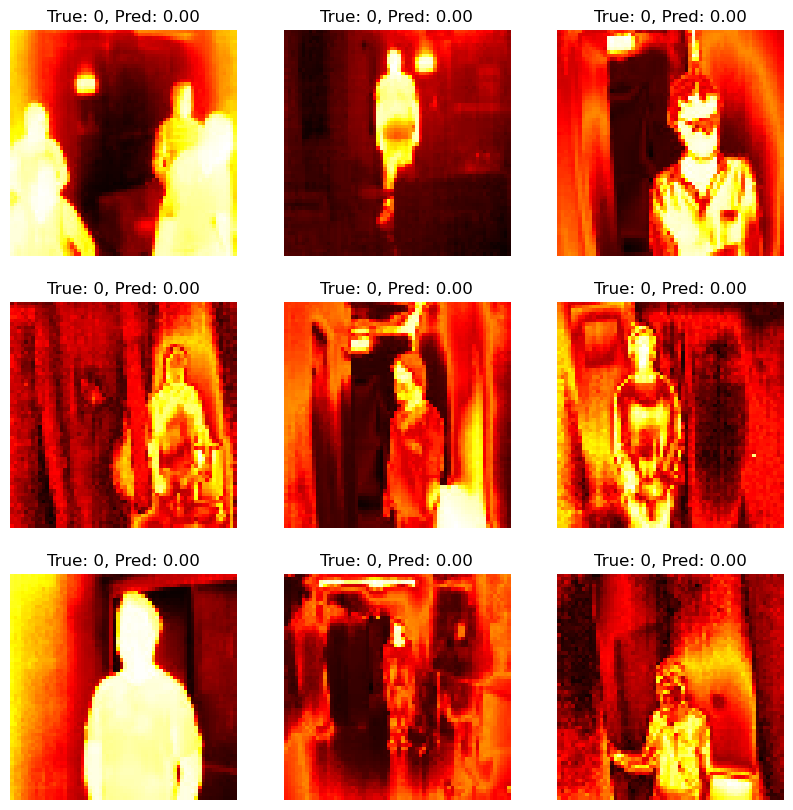

In [7]:
# Load and evaluate the trained model
def evaluate_model(model_path, X_test, y_test_class, y_test_bbox):
    model = tf.keras.models.load_model(model_path)
    
    # Evaluate model
    loss, class_loss, bbox_loss, class_accuracy, bbox_mse = model.evaluate(
        X_test, {'class_output': y_test_class, 'bbox_output': y_test_bbox}
    )
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Classification Loss: {class_loss:.4f}")
    print(f"Test Bounding Box Loss: {bbox_loss:.4f}")
    print(f"Test Classification Accuracy: {class_accuracy * 100:.2f}%")
    print(f"Test Bounding Box MSE: {bbox_mse:.4f}")
    
    # Plot some predictions
    predictions = model.predict(X_test)
    class_predictions = predictions[0]
    bbox_predictions = predictions[1]
    
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_test[i].reshape(64, 64), cmap='hot')
        plt.title(f"True: {y_test_class[i]}, Pred: {class_predictions[i][0]:.2f}")
        plt.axis('off')
    
    plt.show()

# Assuming you have separate ground truth arrays for classification and bounding box predictions
# Evaluate the model
evaluate_model(model_save_path, X_test, y_test, padded_boxes[len(X_train):])


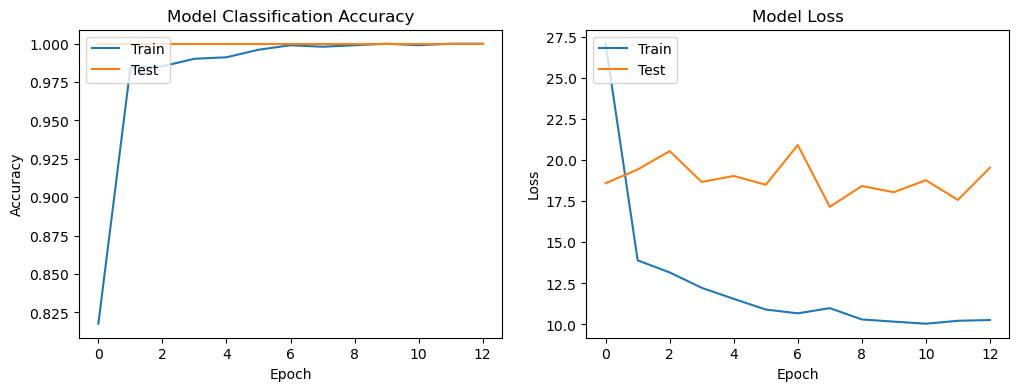

In [36]:
# Visualize the training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot training & validation classification accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['class_output_accuracy'])
    plt.plot(history.history['val_class_output_accuracy'])
    plt.title('Model Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

# Plot the training history
plot_training_history(history)


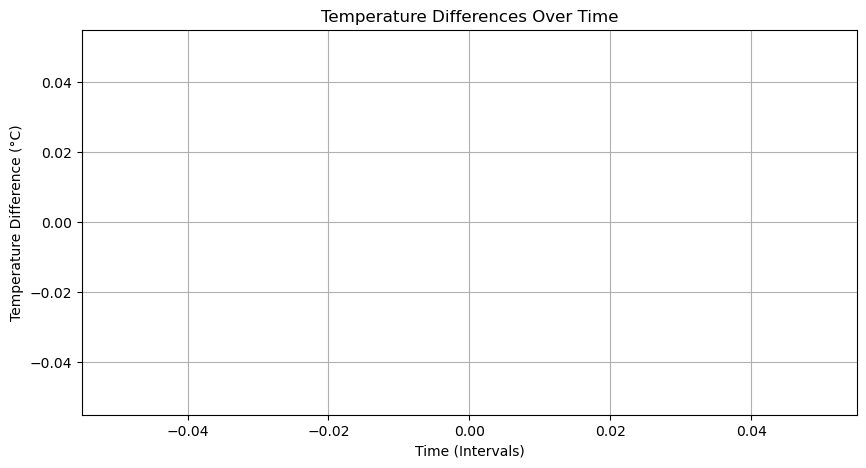

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_thermal_images(data_dir):
    """
    Load thermal images from a directory.
    
    Args:
    - data_dir (str): Path to the dataset directory.
    
    Returns:
    - images (list): List of loaded thermal images.
    """
    images = []
    for file in os.listdir(data_dir):
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        if img is not None:
            images.append(img)
    return images

def convert_to_temperature(image, scale_factor=1.0):
    """
    Convert a thermal image to temperature readings.
    
    Args:
    - image (np.array): Thermal image in grayscale.
    - scale_factor (float): Factor to convert pixel values to temperatures.
    
    Returns:
    - temperature_image (np.array): Array of temperature readings.
    """
    # Assuming the image pixel values are directly proportional to temperature
    # Adjust scale_factor according to your thermal camera's specifications
    temperature_image = image.astype(np.float32) * scale_factor
    return temperature_image

def compute_temperature_differences(images, roi=None):
    """
    Compute temperature differences between consecutive thermal images.
    
    Args:
    - images (list): List of thermal images.
    - roi (tuple): Region of interest (x, y, width, height) for temperature difference calculation. If None, use the whole image.
    
    Returns:
    - temp_diffs (list): List of temperature differences.
    """
    temp_diffs = []
    
    for i in range(len(images) - 1):
        temp1 = convert_to_temperature(images[i])
        temp2 = convert_to_temperature(images[i + 1])

        if roi:
            x, y, w, h = roi
            temp1 = temp1[y:y + h, x:x + w]
            temp2 = temp2[y:y + h, x:x + w]

        # Compute the average temperature difference
        diff = np.mean(temp2 - temp1)
        temp_diffs.append(diff)

    return temp_diffs

def plot_temperature_differences(temp_diffs):
    """
    Plot temperature differences.
    
    Args:
    - temp_diffs (list): List of temperature differences.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(temp_diffs, marker='o', linestyle='-', color='b')
    plt.title('Temperature Differences Over Time')
    plt.xlabel('Time (Intervals)')
    plt.ylabel('Temperature Difference (°C)')
    plt.grid(True)
    plt.show()

# Directory containing thermal images
data_dir = 'E:\\HCL_Technical_Lead\\agricultural_research\\agri_code_files\\themal_image_analysis\\data\\train'

# Load thermal images
thermal_images = load_thermal_images(data_dir)

# Optional: Define a region of interest (ROI) (x, y, width, height)
roi = (10, 10, 50, 50)  # Example ROI; adjust according to your needs

# Compute temperature differences
temperature_differences = compute_temperature_differences(thermal_images, roi)

# Plot the temperature differences
plot_temperature_differences(temperature_differences)
